# Analyze car paremeters

I use data from [otomoto.pl](https://www.otomoto.pl/osobowe) acces on filename (DD_MM_YYYY_hh_mm)

Main goal of analyze is found driver profiles for model.

In [1]:
import os
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

CV = "CV"
EV = "EV"
PHEV = "PHEV"
car_types = [CV, PHEV, EV]

### set plot params

In [2]:
plt.style.use("dark_background")
plt.rc("grid", alpha=0.3)
kde_params = {
    "fill": True,
    "linewidth": 1,
    "common_norm": False,
}

hist_params = {
    "fill": True,
    "linewidth": 0,
    "common_norm": False,
    "common_bins": False,
    "kde": True,
    "stat": "density",
}

### Set data

In [3]:
data_file = os.sep.join(["..", "data", "cars02_05_2023_01_21.csv"])
df = pd.read_csv(data_file)

aliases = {
    "petrol": CV,
    "diesel": CV,
    "petrol-lpg": CV,
    "petrol-cng": CV,
    "electric": EV,
    "hybrid": PHEV,
}

df["type"] = df["fuel_type"].apply(lambda x: aliases[x])

today_year = datetime.date.today().year
today_year = 2023
df["age"] = df["year"].apply(lambda x: today_year - x)

df["mean_year_miliage"] = df.apply(
    lambda row: row["mileage"] // row.age if row.age != 0 else None, axis=1
)

## initial car 

"CV": 0.9736433585313174
"PHEV": 0.007161177105831533
"EV": 0.01919546436285097


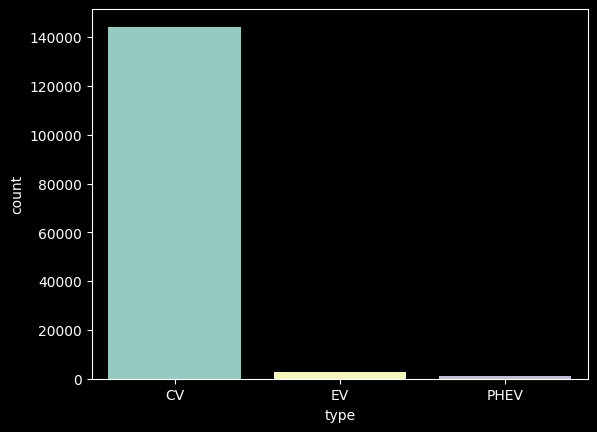

In [14]:
sns.countplot(df, x="type")
initial_factorial = {}
for c_type in car_types:
    initial_factorial[c_type] = len(df[df.type == c_type]) / len(df)
    print(f'"{c_type}": {initial_factorial[c_type]}')

## Mean miliage

In [4]:
suggest_profiles = {
    CV: 14000,
    PHEV: 8000,
    EV: 3000,
}

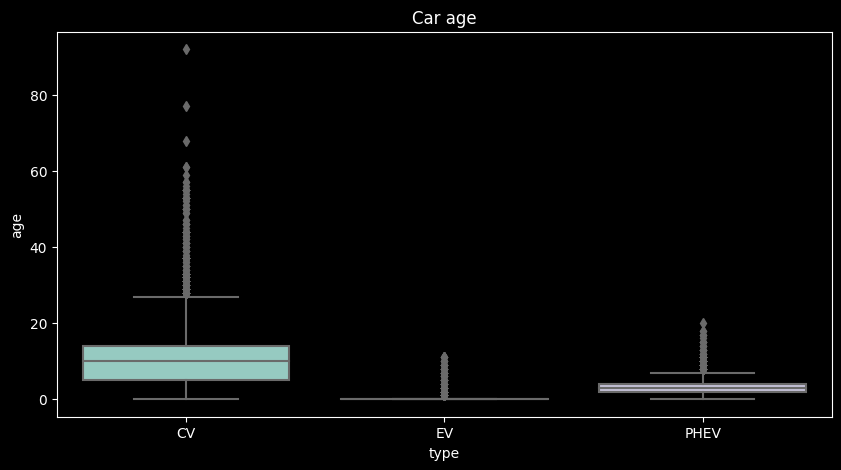

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(df, y="age", x="type")

plt.title("Car age");

Text(0.5, 1.0, 'mean year miliage')

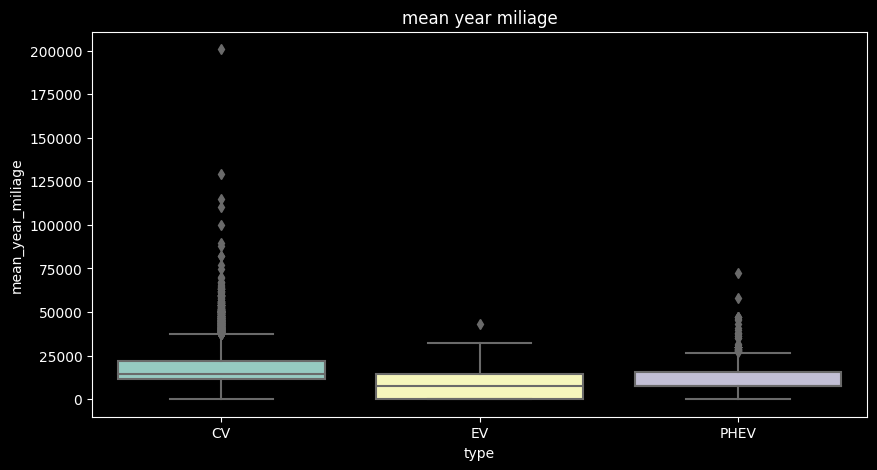

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(df, y="mean_year_miliage", x="type")

plt.title("mean year miliage")

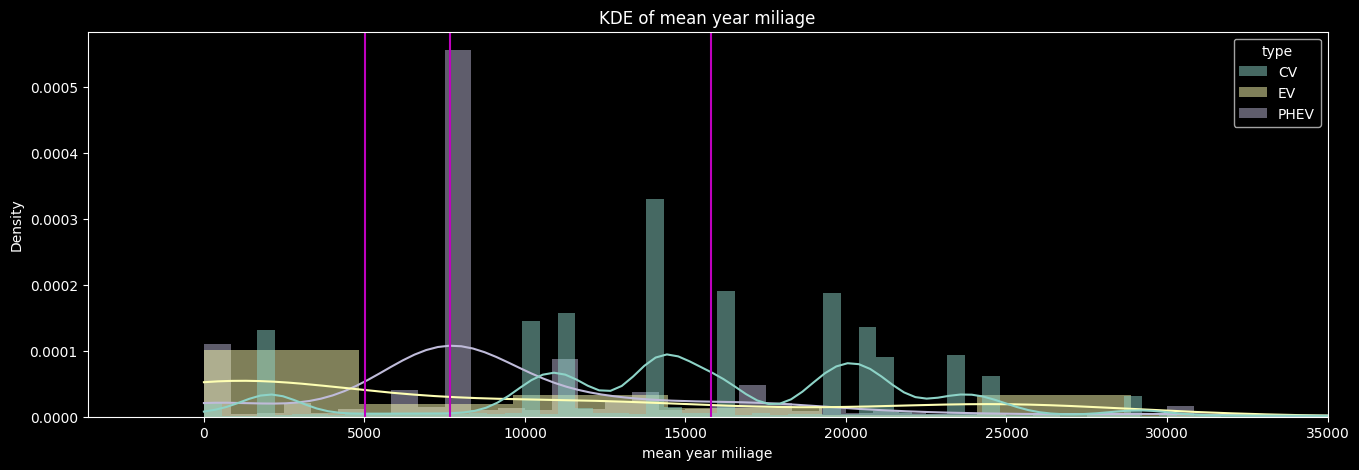

In [7]:
fig, ax = plt.subplots(figsize=(16, 5))
max_age_median = 5

median_mean_miliage = {
    CV: df[(df["type"] == CV) & (df["age"] <= max_age_median)][
        "mean_year_miliage"
    ].median(),
    EV: df[(df["type"] == EV) & (df["age"] <= max_age_median)][
        "mean_year_miliage"
    ].median(),
    PHEV: df[(df["type"] == PHEV) & (df["age"] <= max_age_median)][
        "mean_year_miliage"
    ].median(),
}

hist_plot = sns.histplot(
    df[(df["mean_year_miliage"] < 75_000) & (df["age"] <= max_age_median)],
    x="mean_year_miliage",
    hue="type",
    **hist_params,
)

# for key in median_mean_miliage:
#     plt.axvline(x=median_mean_miliage[key])

for key in suggest_profiles:
    plt.axvline(x=median_mean_miliage[key], color="m")


plt.xlim([None, 35_000])
plt.title("KDE of mean year miliage")
plt.xlabel("mean year miliage");

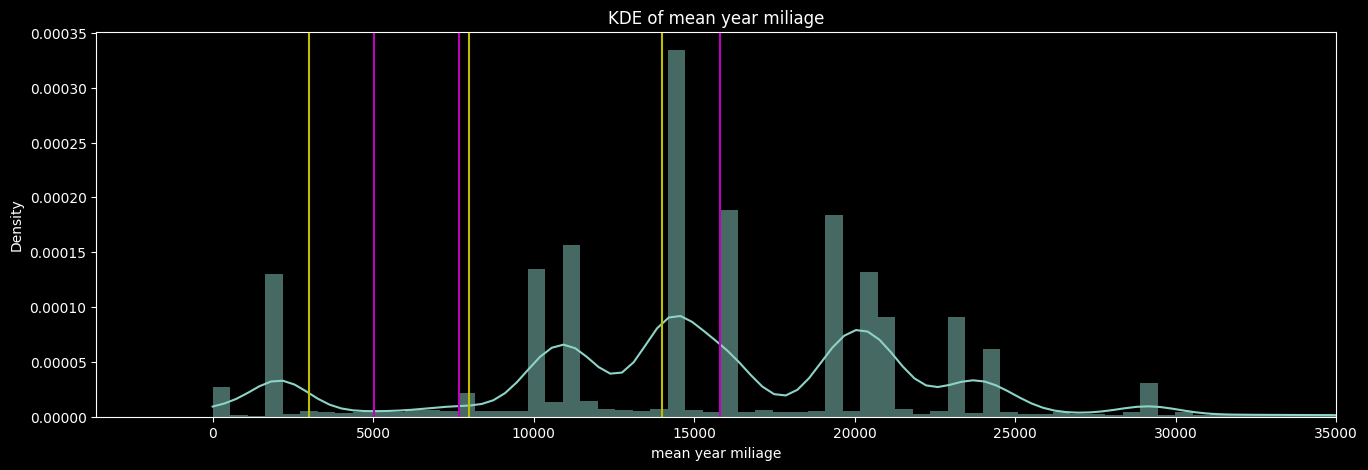

In [8]:
fig, ax = plt.subplots(figsize=(16, 5))
max_age_median = 5


sns.histplot(
    df[(df["mean_year_miliage"] < 75_000) & (df["age"] <= max_age_median)],
    x="mean_year_miliage",
    **hist_params,
)

for key in suggest_profiles:
    plt.axvline(x=median_mean_miliage[key], color="m")
    plt.axvline(x=suggest_profiles[key], color="y")


plt.xlim([None, 35_000])

plt.title("KDE of mean year miliage")
plt.xlabel("mean year miliage");

In [15]:
median_mean_miliage

{'CV': 15800.0, 'EV': 5030.0, 'PHEV': 7666.0}

# Profiles distribution

In [16]:
profiles_distribution = {}
profiles_distribution[CV] = len(
    df[
        df.mean_year_miliage
        > (median_mean_miliage[CV] * 9 + median_mean_miliage[PHEV]) / 10
    ]
) / len(df)

profiles_distribution[EV] = len(
    df[
        df.mean_year_miliage
        < (median_mean_miliage[EV] * 9 + median_mean_miliage[PHEV]) / 10
    ]
) / len(df)

profiles_distribution[PHEV] = 1 - profiles_distribution[CV] - profiles_distribution[EV]

In [17]:
profiles_distribution

{'CV': 0.4407734881209503,
 'EV': 0.028017008639308855,
 'PHEV': 0.5312095032397408}